In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
df=pd.read_csv("ipl.csv")

In [3]:
df


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [4]:
df = df[0:50000]

In [5]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             50000 non-null  int64  
 1   date            50000 non-null  object 
 2   venue           50000 non-null  object 
 3   bat_team        50000 non-null  object 
 4   bowl_team       50000 non-null  object 
 5   batsman         50000 non-null  object 
 6   bowler          50000 non-null  object 
 7   runs            50000 non-null  int64  
 8   wickets         50000 non-null  int64  
 9   overs           50000 non-null  float64
 10  runs_last_5     50000 non-null  int64  
 11  wickets_last_5  50000 non-null  int64  
 12  striker         50000 non-null  int64  
 13  non-striker     50000 non-null  int64  
 14  total           50000 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 5.7+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

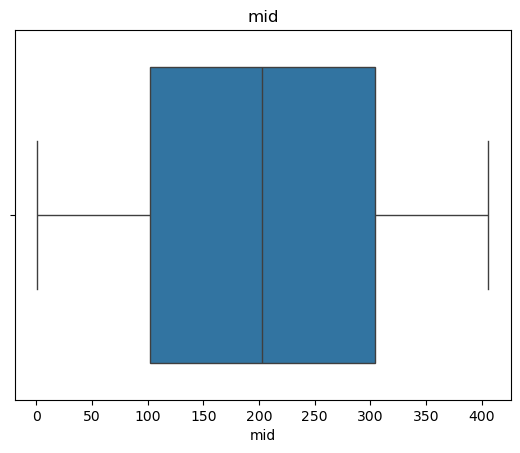

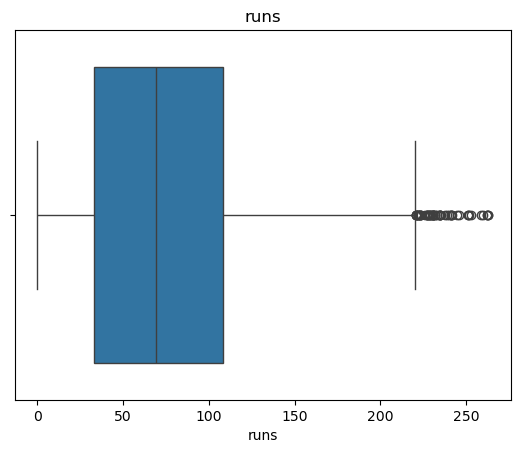

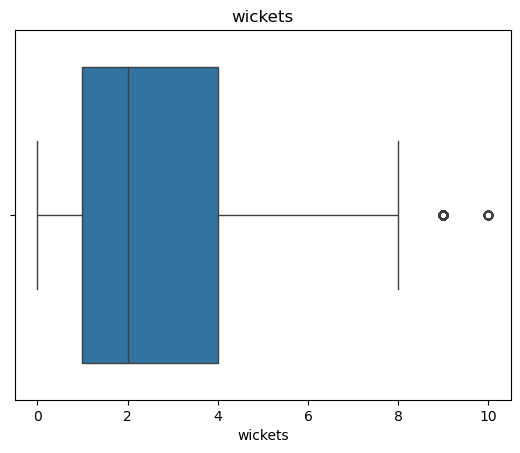

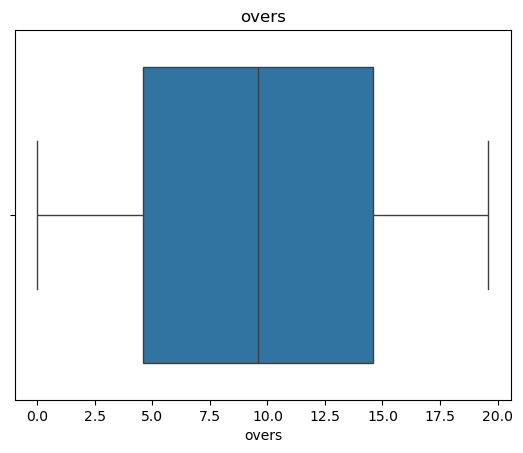

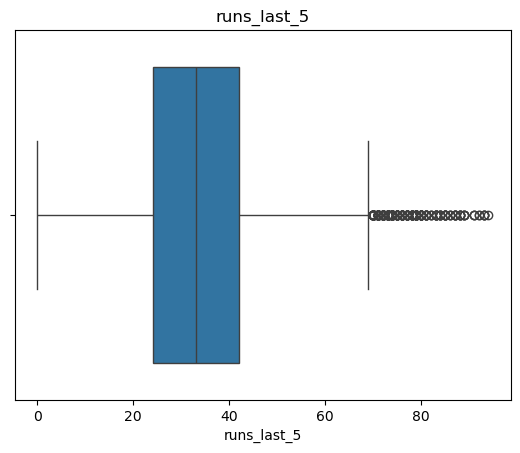

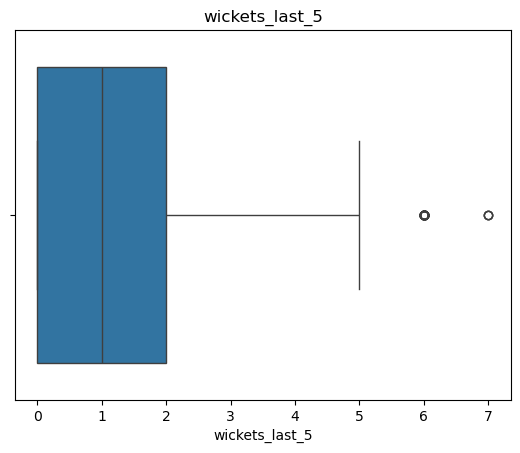

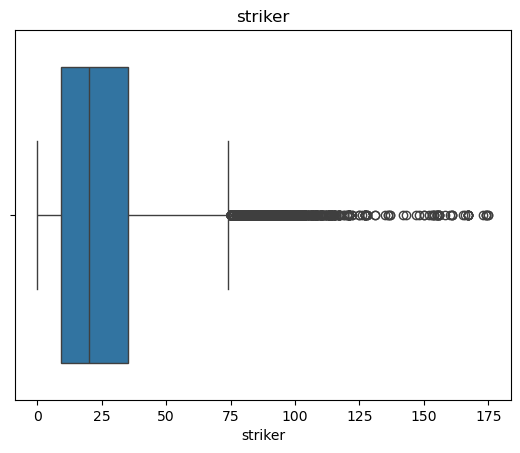

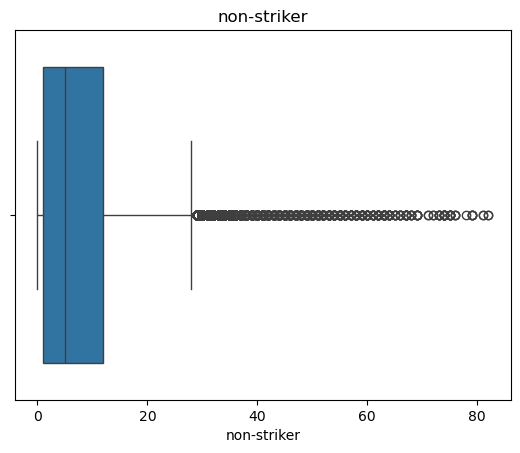

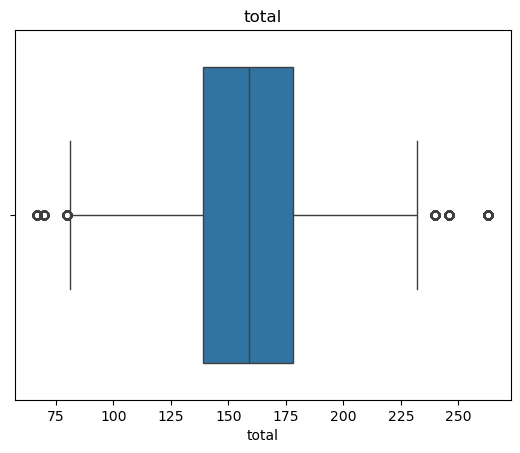

In [9]:
outliers(df)

In [10]:
def treat_outliers(df, column_name):
    # Step 1: Calculate quartiles and IQR
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1

    # Step 2: Calculate lower and upper fences
    lf = q1 - 1.5 * IQR
    uf = q3 + 1.5 * IQR

    # Step 3: Replace outliers
    df[column_name] = np.where(df[column_name] > uf, uf, df[column_name])
    df[column_name] = np.where(df[column_name] < lf, lf, df[column_name])

    # Step 4: Boxplot after outlier treatment
    plt.boxplot(df[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.show()

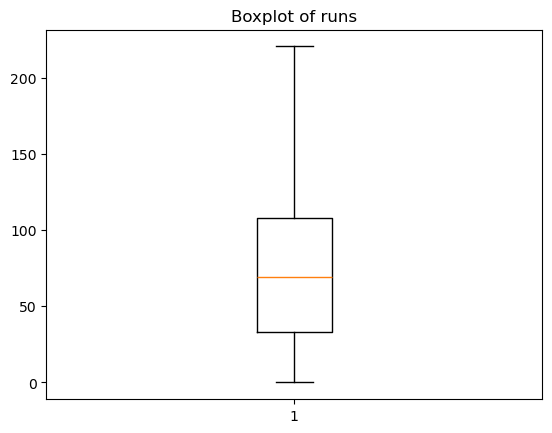

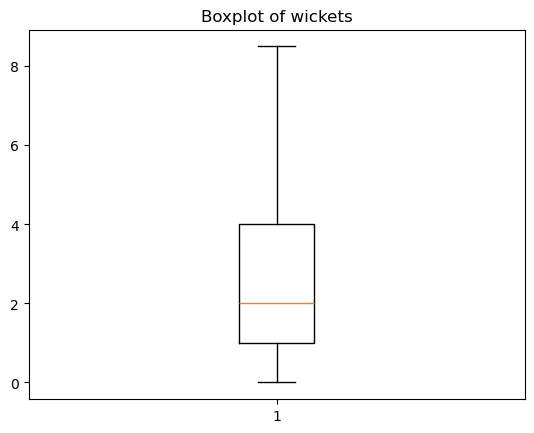

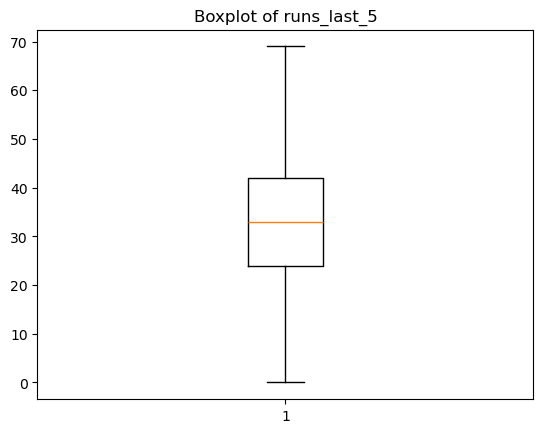

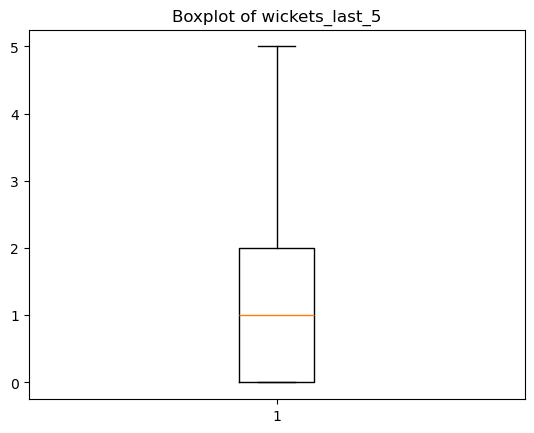

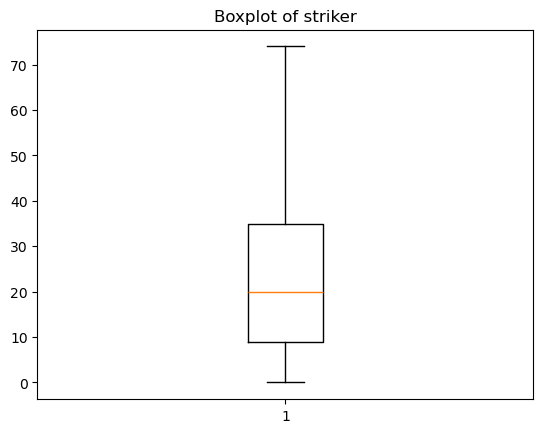

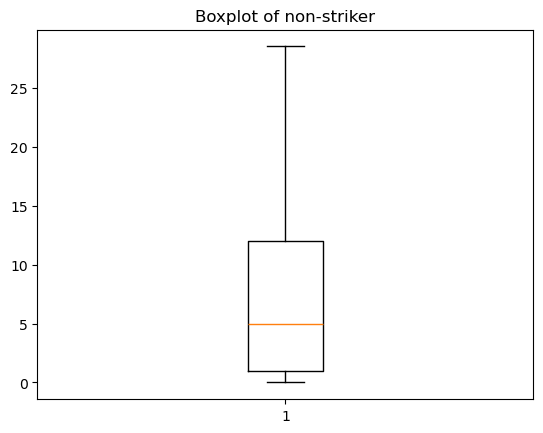

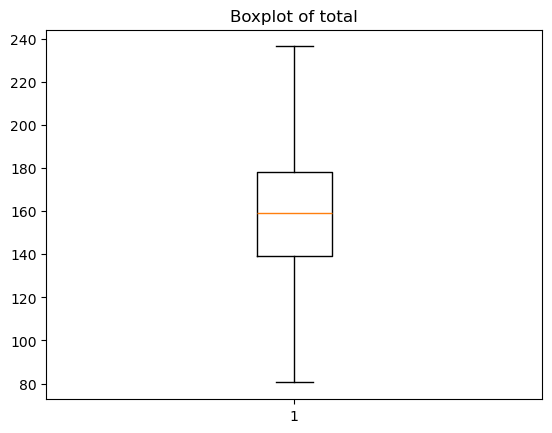

In [11]:
treat_outliers(df,"runs")
treat_outliers(df,"wickets")
treat_outliers(df,"runs_last_5")
treat_outliers(df,"wickets_last_5")
treat_outliers(df,"striker")
treat_outliers(df,"non-striker")
treat_outliers(df,"total")




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             50000 non-null  int64  
 1   date            50000 non-null  object 
 2   venue           50000 non-null  object 
 3   bat_team        50000 non-null  object 
 4   bowl_team       50000 non-null  object 
 5   batsman         50000 non-null  object 
 6   bowler          50000 non-null  object 
 7   runs            50000 non-null  float64
 8   wickets         50000 non-null  float64
 9   overs           50000 non-null  float64
 10  runs_last_5     50000 non-null  float64
 11  wickets_last_5  50000 non-null  float64
 12  striker         50000 non-null  float64
 13  non-striker     50000 non-null  float64
 14  total           50000 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 5.7+ MB


In [13]:
df1=pd.get_dummies(df,columns=["bat_team"],drop_first=True)

In [14]:
#df["bat_dummy"]=np.where(df["bat_team"]=="",1,0)

In [15]:
df1.columns

Index(['mid', 'date', 'venue', 'bowl_team', 'batsman', 'bowler', 'runs',
       'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total', 'bat_team_Deccan Chargers',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kochi Tuskers Kerala', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Pune Warriors',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad'],
      dtype='object')

In [16]:
y=df1["total"]
X=df1[['mid','runs',
       'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total', 'bat_team_Deccan Chargers',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kochi Tuskers Kerala', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Pune Warriors',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad']]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=66)

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
lr.score(X_train,y_train)

1.0

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
actual=np.exp(y_train)
pred = lr.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Squared Error (MSE): 1.6887934258971422e-27
Root Mean Squared Error (RMSE): 4.1094931876049416e-14
Mean Absolute Error (MAE): 3.0401281492231646e-14
Mean Absolute Percentage Error (MAPE): 2.0129135554815205e-14%


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.random.rand(100, 1) * 10  # Random feature
y = 2 * X + 1 + np.random.randn(100, 1) * 2  # Target variable with some noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression tree
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)




DecisionTreeRegressor(max_depth=3)

In [38]:
regressor.score(X_train,y_train)

0.9494548580626592

In [40]:
print("Train accuracy",regressor.score(X_train,y_train))
print("Test accuracy",regressor.score(X_test,y_test))

Train accuracy 0.9494548580626592
Test accuracy 0.8633219512003817


In [42]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [44]:
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Squared Error (MSE): 4.0073587642764155
Root Mean Squared Error (RMSE): 2.0018388457306986
Mean Absolute Error (MAE): 1.6133856115914527
Mean Absolute Percentage Error (MAPE): 82.09741625754074%
